In [10]:
def merge(A, p, q, r):
    global steps
    L = A[p : q + 1]
    R = A[q + 1 : r + 1]

    L.append(float("inf"))
    R.append(float("inf"))
    i = 0
    j = 0

    steps+=6
    
    for k in range(p, r + 1):
        if L[i] <= R[j]:
            A[k] = L[i]
            i += 1
            steps+=2
        else:
            A[k] = R[j]
            j += 1
            steps+=2


steps=0

def merge_sort(A, p, r):
    global steps
    if p < r:
        steps+=1
        q = (p + r) // 2
        merge_sort(A, p, q)
        merge_sort(A, q + 1, r)
        merge(A, p, q, r)
    return steps


In [11]:
import math
import matplotlib.pyplot as plt
import matplotlib as mpl

N=[]
step_list=[]
ref=[]
c=[]
points=14
A=[1,6,3,2,8,0]

for i in range(points):
    steps=merge_sort(A,0 ,len(A)-1)
    N.append(len(A))
    step_list.append(steps)
    c.append(steps/(len(A)*math.log(len(A)))) #estimate c in T(sort)=c*N*log(N)
    
    A*=2


ref=[]
for value in N:
    ref.append([value*math.log(value) *c[6]])
    # ref.append(math.floor(value*math.log(value)*c[6]))
    
print(c[6])





7.462867039014939


[6, 12, 24, 48, 96, 192, 384, 768, 1536, 3072, 6144, 12288, 24576, 49152] [67, 232, 617, 1490, 3435, 7716, 17053, 37270, 80783, 173960, 372609, 794490, 1687411, 3571564]
[6, 12, 24, 48, 96, 192, 384, 768, 1536, 3072, 6144, 12288, 24576, 49152] [[80.22997610846973], [222.53433518078288], [569.2174362892526], [1386.732404433879], [3270.0598725785053], [7533.309872578505], [17053.0], [38078.760509685984], [84103.04203874392], [184097.12611623175], [399976.3363099514], [863516.8407748785], [1854162.017859708], [3962580.7083393186]]


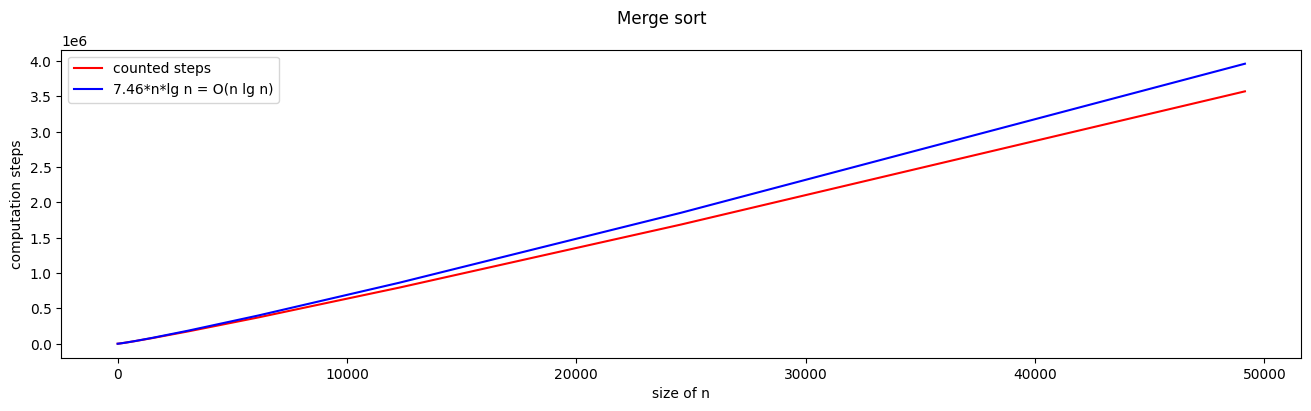

In [12]:
print(N,step_list)
print(N,ref)

mpl.rcParams['figure.figsize'] = [16,4]
fig, ax = plt.subplots(1, 1)
fig.suptitle('Merge sort')

ax.plot(N,step_list, color="red", label="counted steps")
ax.plot(N, ref, color="blue", label=f"{round(c[6],2)}*n*lg n = O(n lg n)")
ax.set_xlabel("size of n")
ax.set_ylabel("computation steps")
ax.legend()